Populating the interactive namespace from numpy and matplotlib


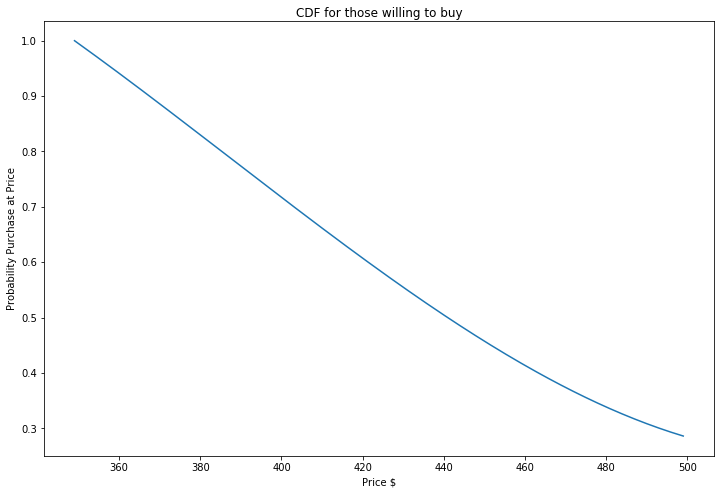

([<matplotlib.axis.XTick at 0x106770dd0>,
 <a list of 3 Text xticklabel objects>)

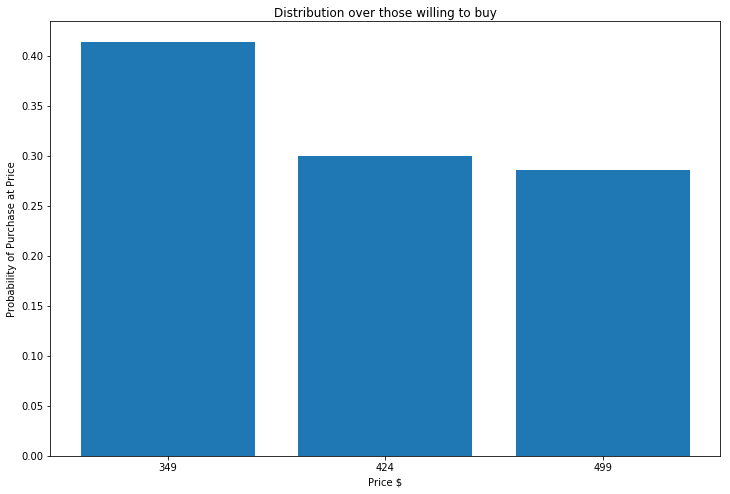

In [14]:
%pylab inline
pylab.rcParams['figure.figsize'] = (12, 8)
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import spline

market_share = np.arange(0, 0.101, 0.005)
unit_prices = np.array([349, 424, 499])
weights = np.array([0.414, 0.3, 0.286]) # From focus group we know 28.6% would buy at $499
cdf = np.array([np.sum(weights[i:]) for i in range(len(weights))])

xnew = np.linspace(unit_prices.min(),unit_prices.max(),200) 

plt.title("CDF for those willing to buy")
plt.xlabel("Price $")
plt.ylabel("Probability Purchase at Price")
plt.plot(xnew, spline(unit_prices,cdf,xnew))
plt.show()

plt.title("Distribution over those willing to buy")
plt.xlabel("Price $")
plt.ylabel("Probability of Purchase at Price")
plt.bar(range(len(unit_prices)), weights, align="center")
plt.xticks(range(len(unit_prices)), unit_prices)

It's reasonable to assume that people are more likely to purchase when the price is lower. We know from the focus group: if the price is $\$499$, $28.6\%$ would purchase. The remaining values are just made up with the assumption that $\$349$ would be a more attractive price. For example: If someone is willing to purchase at $\$424$, they would also purchase at $\$349$. 

The following graph shows the profit that would be earned for creatives. The three lines reflect the cumulative probability distributions in the above graphs, i.e. purchasing at a price includes all above prices.

The following graphs are following: https://www.statista.com/statistics/276306/global-apple-iphone-sales-since-fiscal-year-2007/, yearly iPhone sales. It's unlikely that a startup struggling for money will be able to sell more units in a year than even 2007 Apple.

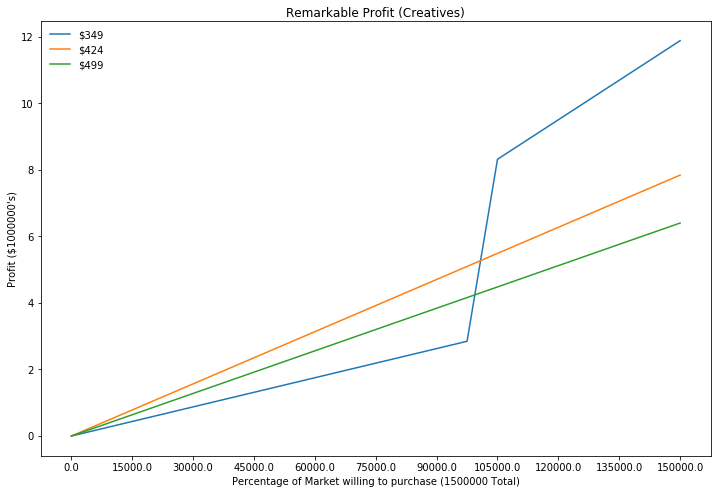

In [15]:
creatives_market_size = 1500000
professional_market_size = 45000000
engineers_market_size = 5000000

def profit(total_sold, unit_price, variable_cost, SGA=0.2):
    return total_sold * (unit_price * (1-SGA) - variable_cost)

fig, ax = plt.subplots(1)
for i in range(len(unit_prices)):
    profits = []
    for share in market_share:
        total_sold = share * creatives_market_size * cdf[i]
        var_cost = 200 if (total_sold > 100000) else 250
        profits.append(profit(total_sold, unit_prices[i], var_cost) / 1000000)
    ax.plot(profits, label="$" + str(unit_prices[i]))

ax.set_xticks(range(0, len(market_share), 2))
ax.set_xticklabels(market_share[::2] * creatives_market_size)


plt.title("Remarkable Profit (Creatives)")
plt.xlabel("Percentage of Market willing to purchase (%s Total)" % creatives_market_size)
plt.ylabel("Profit ($1000000's)")
plt.legend()
plt.show()

The above graph is showing Remarkable's "profit", this includes:
- Production costs: $\$200$ per unit if over $100000$ units, $\$250$ otherwise.
- SG&A: 20% of sales

Giving the calculation:
$$profit = \text{annual_sold} * (\text{unit_price} * 0.8 - \text{variable_cost})$$

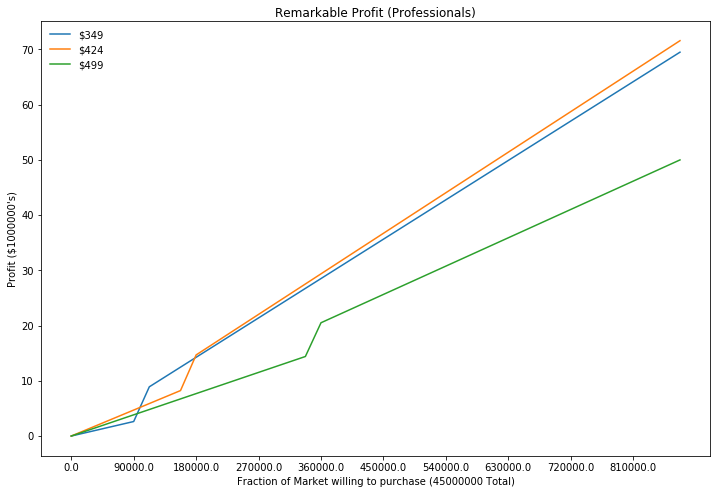

In [18]:
market_share = np.arange(0, 0.02, 0.0005)

fig, ax = plt.subplots(1)
for i in range(len(unit_prices)):
    profits = []
    for share in market_share:
        total_sold = share * professional_market_size * cdf[i]
        var_cost = 200 if (total_sold > 100000) else 250
        profits.append(profit(total_sold, unit_prices[i], var_cost) / 1000000)
    ax.plot(profits, label="$" + str(unit_prices[i]))

ax.set_xticks(range(0, len(market_share), 4))
ax.set_xticklabels(market_share[::4] * professional_market_size)


plt.title("Remarkable Profit (Professionals)")
plt.xlabel("Fraction of Market willing to purchase (%s Total)" % professional_market_size)
plt.ylabel("Profit ($1000000's)")
plt.legend()
plt.show()